<a href="_index.ipynb">&larr; SMP </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# Abgetasteter Sinus
    
Demonstriere Aliasing mit mehreren Sinusfunktionen unterschiedlicher Frequenz und Phase,
die alle die gleiche abgetastete Sequenz liefern (-> Aliasing!)

TODO: 
* DFT der ursprünglichen und abgetasteten Signale
* Grafikformatierung
* Animation
* Splitten in mehrere Notebooks?
 
Ehemals SMP_sampled_sine.py


In [1]:
import numpy as np

from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, stem, grid, xlabel, ylabel, \
    subplot, title, clf, xlim, ylim

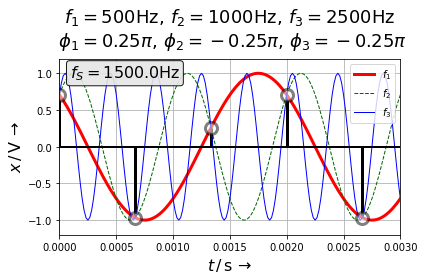

In [2]:
f_1 = 500;    f_2 = 1000;    f_3 = 2500
phi_1 = pi/4; phi_2 = -pi/4; phi_3 = -pi/4
A1 = 1.; A2 = 1.; A3 = 1.
Np = 1.5 # Plotte Np Perioden mit f_1:
OSR = 1.5  # Oversampling Ratio in Bezug auf f_1

t_min = 0; t_max = t_min + Np / f_1
N = 120; # Anzahl Datenpunkte pro Periode von f_1

NMax = int(Np*N)

# Erzeuge Vektor mit Np*N aequidistanten Zeitpunkten (Np Perioden von f_1):
t  = linspace(t_min, t_max, NMax+1)
#

NS = int(np.floor(N / (2 * OSR))) # Abtastung alle NS Zeitpunkte
t_S = t[0:NMax:NS] # Vektor mit Sampling-Zeitpunkten
f_S = 2 * f_1 * OSR # Abtastfrequenz
#t_P =  t(1 : NS/8 : 2*N);
x1 = A1 * cos(f_1 * 2 * pi * t + phi_1)
x2 = A2 * cos(f_2 * 2 * pi * t + phi_2)
x3 = A3 * cos(f_3 * 2 * pi * t + phi_3)
# Abtasten der drei Funktionen

x1_S = x1[0: NMax: NS]
x2_S = x2[0: NMax: NS]
x3_S = x3[0: NMax: NS]
#%% Figure 1: Zeitbereich
fig1 = plt.figure(1) # neue Grafik
plt.clf()
ax1 = fig1.add_subplot(111)
ax1.plot(t, x1, linewidth = 3, color = 'r', label='$f_1$')
ax1.plot(t, x2, color = (0, 0.4, 0), lw = 1., linestyle='--',label='$f_2$')
ax1.plot(t, x3, color = 'b', linewidth = 1., linestyle='-', label='$f_3$')
plt.legend()

[ml,sl,bl] = ax1.stem(t_S, x1_S, use_line_collection=True)
plt.setp(ml, 'markerfacecolor', 'white', alpha = 0.5,
         markeredgecolor = 'k', markeredgewidth=3.0, markersize = 12)
plt.setp(sl, linewidth = 3, color = 'k')
plt.setp(bl, 'color', 'white')

title_string = '$f_1 = %d \mathrm{ Hz},\, f_2 = %d \mathrm{ Hz},\, f_3 = %d \mathrm{ Hz}$ \n \
$\phi_1 = %g \pi,\, \phi_2 = %g \pi,\, \phi_3 = %g \pi$' \
                 % (f_1,f_2,f_3,phi_1 / pi, phi_2 / pi, phi_3 / pi)
#plt.title('Analoge Signale mit gleicher Abgetasteten\n' + title_string, fontsize = 18)
plt.title(title_string, fontsize = 18, ha = 'center', va = 'bottom')
ax1.set_xlabel(r'$t \, \mathrm{/ \, s\,} \rightarrow $', fontsize = 16)
ax1.set_ylabel(r'$x \, \mathrm{/ \, V\,} \rightarrow $', fontsize = 16)
ax1.text(.03, 0.97, r'$f_S = %.1f \mathrm{Hz}$' %(f_S), fontsize=16,
         ha="left", va="top",linespacing=1.5, transform=ax1.transAxes,
         bbox=dict(alpha=0.9,boxstyle="round,pad=0.2", fc='0.9'))
grid('on')
plt.axhline(0., xmin = 0., xmax = 1, linewidth=2, color='k')
ax1.axis([t_min, t_max, -1.2, 1.2])
plt.tight_layout()
#plt.savefig('D:/Daten/ueb-SMP-Spectra_ML_t.png')

plotte 3 Sinusfunktionen bei f_s/2, ehem. SMP_sampled_sine_fs_2.py

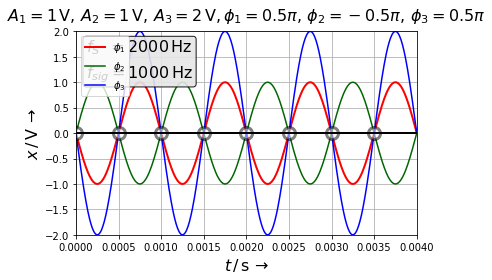

In [3]:
f_1 = 1000;  f_2 = 1000;         f_3 = 1000
phi_1 = pi/2;   phi_2 = -pi/2;      phi_3 = pi/2
A_1 = 1.;    A_2 = 1; A_3 = 2
Np = 4 # Plotte Np Perioden mit f_1:
OSR = 1 # Oversampling Ratio    

t_min = 0; t_max = t_min + Np / f_1 
N = 120; # Anzahl Datenpunkte pro Periode von f_1
# Erzeuge Vektor mit Np*N aequidistanten Zeitpunkten (Np Perioden von f_1):
t  = linspace(t_min, t_max, Np*N+1)
#

NS = int(np.floor(N / (2 * OSR))) # Abtastung alle NS Zeitpunkte
t_S = t[0:Np*N:NS] # Vektor mit Sampling-Zeitpunkten
f_S = 2 * f_1 * OSR # Abtastfrequenz
#t_P =  t(1 : NS/8 : 2*N); 
x1 = A_1 * cos(f_1*2*pi*t + phi_1)
x2 = A_2 * cos(f_2*2*pi*t + phi_2)
x3 = A_3 * cos(f_3*2*pi*t + phi_3)
# Abtasten der drei Funktionen
x1_S = x1[0:Np*N:NS]
x2_S = x2[0:Np*N:NS]
x3_S = x3[0:Np*N:NS]
#%% Figure 1: Zeitbereich
fig1 = plt.figure(1) # neue Grafik
plt.clf()
ax1 = fig1.add_subplot(111) 
ax1.plot(t, x1, linewidth = 2, color = 'r', label='$\phi_1$')
ax1.plot(t, x2, color = (0, 0.4, 0), lw = 1.5, linestyle='-',label='$\phi_2$')
ax1.plot(t, x3, color = 'b', linewidth = 1.5, linestyle='-', label='$\phi_3$')
plt.legend()

[ml,sl,bl] = ax1.stem(t_S,x1_S, use_line_collection=True)
plt.setp(ml, 'markerfacecolor', 'white', alpha = 0.5, 
         markeredgecolor = 'k', markeredgewidth=3.0, markersize = 12)
plt.setp(sl, linewidth = 3, color = 'k')
plt.setp(bl, 'color', 'white') 

title_string = '$A_1 = %.3g \mathrm{\,V},\, A_2 = %.3g \mathrm{\,V},\,\
                 A_3 = %.3g \mathrm{\,V}, \
                 \phi_1 = %.3g \pi,\, \phi_2 = %.3g \pi,\, \phi_3 = %.3g \pi$' \
                 % (A_1,A_2,A_3,phi_1 / pi, phi_2 / pi, phi_3 / pi)
#plt.title('Analoge Signale mit gleicher Abgetasteten\n' + title_string, fontsize = 18)
plt.title(title_string, fontsize = 16, ha = 'center', va = 'bottom')
ax1.set_xlabel(r'$t \, \mathrm{/ \, s\,} \rightarrow $', fontsize = 16)
ax1.set_ylabel(r'$x \, \mathrm{/ \, V\,} \rightarrow $', fontsize = 16)
ax1.text(.03, 0.97, r'$f_S \;\;= %d \mathrm{\,Hz}$'%(f_S) + '\n' + \
         r'$f_{sig} = %d \mathrm{\,Hz}$' %(f_1), fontsize=16,
         ha="left", va="top",linespacing=1.5, transform=ax1.transAxes,
         bbox=dict(alpha=0.9,boxstyle="round,pad=0.2", fc='0.9')) 
grid('on')
plt.axhline(0., xmin = 0., xmax = 1, linewidth=2, color='k')
ax1.axis([t_min, t_max, -2, 2])
plt.tight_layout()
#plt.savefig('D:/Daten/ueb-SMP-Spectra_ML_t.png')


ehem. SMP-sine_alias.py, Todo: Interpolation zwischen abgetasteten Punkten

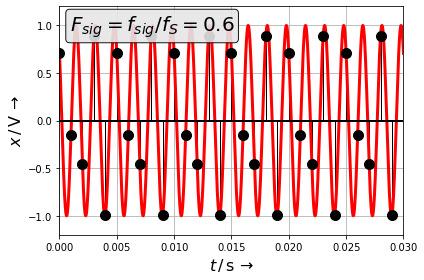

In [4]:
f_1 = 600
phi_1 = pi/4
A_1 = 1.
Np = 30 # Plotte Np Punkte mit f_S:
f_S = 1000 # Abtastfrequenz  

t_min = 0; t_max = t_min + Np / f_S 
N = 120; # Anzahl Datenpunkte pro Periode von f_1
# Erzeuge Vektor mit Np*N aequidistanten Zeitpunkten (Np Perioden von f_1):
t  = linspace(t_min, t_max, Np*N+1)
#
t_S = arange(t_min, t_max, 1/f_S)  # Vektor mit Sampling-Zeitpunkten

#t_P =  t(1 : NS/8 : 2*N); 
x1 = A_1 * cos(f_1*2*pi*t + phi_1)
# Abtasten 
x1_S = A_1 * cos(f_1*2*pi*t_S + phi_1)

#%% Figure 1: Zeitbereich
fig1 = plt.figure(1) # neue Grafik
plt.clf()
ax1 = fig1.add_subplot(111) 
ax1.plot(t, x1, linewidth = 3, color = 'r', label='$\phi_1$')

[ml,sl,bl] = ax1.stem(t_S,x1_S)
plt.setp(ml, 'markerfacecolor', 'k', marker ='o',
         markeredgecolor = 'k', markeredgewidth=1.0, markersize = 10)
plt.setp(sl, linewidth = 1, color = 'k')
plt.setp(bl, 'color', 'white') 

title_string = '$f_{sig} = %.3g \mathrm{\,Hz},\, f_{S} = %.4g \mathrm{\,Hz}$' \
                 % (f_1,f_S)
ax1.set_xlabel(r'$t \, \mathrm{/ \, s\,} \rightarrow $', fontsize = 16)
ax1.set_ylabel(r'$x \, \mathrm{/ \, V\,} \rightarrow $', fontsize = 16)
ax1.text(.03, 0.97, r'$F_{sig} = f_{sig} / f_S =  %.2g$'%(f_1 / f_S), fontsize=20,
         ha="left", va="top",linespacing=1.5, transform=ax1.transAxes,
         bbox=dict(alpha=0.9,boxstyle="round,pad=0.2", fc='0.9')) 
grid('on')
plt.axhline(0., xmin = 0., xmax = 1, linewidth=2, color='k')
ax1.axis([t_min, t_max, -1.2, 1.2])
plt.tight_layout()
#plt.savefig('D:/Daten/ueb-SMP-Spectra_ML_t.png')


ehem. SMP_alias_animate - das funktioniert so nicht!

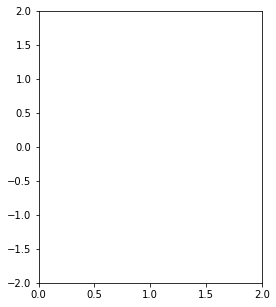

In [6]:

# see https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

import matplotlib.animation as animation

#
#plt.rcParams['animation.ffmpeg_path'] = 'D:/Programme/ffmpeg/bin/ffmpeg.exe'
plt.rcParams['animation.ffmpeg_path'] = '/opt/ffmpeg-3.02/ffmpeg'
#plt.rcParams['savefig.bbox'] = 'tight' # tight - this garbles the video!!!

#movie_file = 'D:/Daten/basic_animation.mp4'
movie_file = '/home/muenker/Daten/basic_animation.mp4'

dpi = 100
fps = 30

ffmpeg_writer = animation.FFMpegWriter(fps = fps, extra_args=['-vcodec', 'libx264'])


#animation.MovieWriterRegistry.list()

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
fig.set_size_inches(4, 5, True)
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background for each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
# frames: number of frames to be recorded
# interval: time between frames in ms = 1000/fps ; 
# total length = frames x interval
anim = animation.FuncAnimation(fig, animate, init_func=init, frames = 50, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save(movie_file, dpi=dpi, writer=ffmpeg_writer)

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2021*.